In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from matplotlib import gridspec
from pathlib import Path
from random import sample, choice, choices

from My_libraries.my_stats import half_frame
# from my_stats import half_frame

# Statistical Inference

Consider a sample comprised of $N$ i.i.d. random variables $x_1, x_2, ..., x_N$.  (What does i.i.d. mean?)  What is the expected value of $X$? that is, what is the mean of $X$?

What we are trying to do here is to **estimate** the value of a function of $X$.  When dealing with a stochastic process, we are mostly interested in such estimates.  Importantly, **this estimate is itself a random variable**.  As such, it also has an expected value and a distribution. The distribution of a statistic obtained on a sample is called a **sampling distribution**.

.

.

.

.

.

More generally, whatever quantity calculated from random variables that we can define is called **a statistic**. The mean of a sample of random variables is a statistic.  The difference between the means of two samples of random variables is also a statistic.

Sampling distributions are important in statistics because they provide a major simplification en route to **statistical inference**. More specifically, they allow analytical considerations to be based on the probability distribution of a statistic, rather than on the joint probability distribution of all the individual sample values. 

.

.

.

.

.

For example, consider a normal population with mean $\mu$ and variance $\sigma^2$. Assume we repeatedly take samples of a given size from this population and calculate the arithmetic mean $\bar x$  for each sample $-$ this statistic is called the sample mean. The distribution of these means is called the **sampling distribution of the sample mean**. This distribution is normal $N ( \mu , \sqrt{\sigma^2 ~/~ N} )$ since the underlying population is normal but sampling distributions are often close to normal even when the population distribution is not because of the CLT.

The mean of a sample from a population having a normal distribution is an example where one can get analytical results.  For other statistics and other populations, the situation is more complicated, and we are often unable to obtain closed-form expressions. In such cases the sampling distributions may be approximated through Monte-Carlo simulations, bootstrap methods, or asymptotic distribution theory. 

The sampling distribution depends on:

1. the underlying distribution of the population, 
2. the statistic being considered, 
3. the sampling procedure employed, and 
4. the sample size used. 

**Let's try to check these statements ourselves!**



## Words to remember

**statistic**

**sampling distribution**

**point estimate**

# Sampling distribution

## Monte Carlo simulation

I wrote code to generate some samples with $N = 5, 25, 125$ normally distributed random variables and to plot the sampling distribution.  

The example below if for the sample mean. Play with the code by setting your statistic as the sample's (a) variance, (b) median, and (c) maximum.

In [8]:
n_samples = 2000
mu = 0.0
sigma = 1.0
my_sizes = [5, 25, 125]

statistic = np.mean
name_statistic = 'mean'
x_max = 5
x = np.linspace(-x_max, x_max, 80 )

sampling_dist = {}

for n in my_sizes:
    sampling_dist[n] = []
    for i in range(n_samples):
        sample = stats.expon.rvs(0, 1, size = n)
#         sample = stats.norm.rvs(mu, sigma, size = n)
        sampling_dist[n].append(statistic(sample))



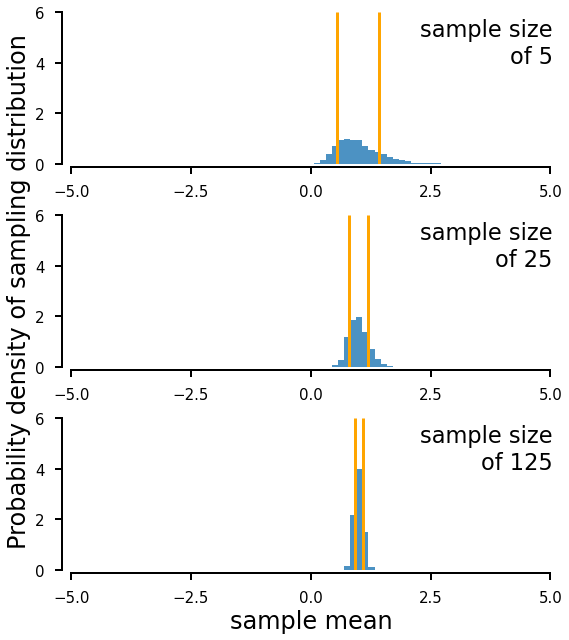

In [9]:
my_font_size = 15
fig = plt.figure( figsize = (8, 3*3) )

ax = []
for i, n in enumerate(my_sizes):
    ax.append( fig.add_subplot(3,1,i+1) )
    if n == my_sizes[1]:
        half_frame(ax[1], '', 'Probability density of sampling distribution', 
                   font_size = my_font_size)
    elif n == my_sizes[2]:
        half_frame(ax[-1], f'sample {name_statistic}', '', font_size = my_font_size)
    else:
        half_frame(ax[-1], '', '', font_size = my_font_size)
    ax[-1].hist(sampling_dist[n], bins = x, density= True, alpha = 0.8)
    ax[-1].set_xticks(np.linspace(-x_max, x_max, 5))
    ax[-1].set_ylim(0, 6)
    ax[-1].set_xlim(-x_max, x_max)

    mean_sample_dist = np.mean(sampling_dist[n])
    st_dev_sample_dist = np.std(sampling_dist[n])
    
    # Print useful info
    ax[-1].text(x_max+0.05, 4, f'sample size\nof {n}', fontsize = 1.5* my_font_size, ha = 'right')
    ax[-1].vlines([mean_sample_dist-st_dev_sample_dist, 
                   mean_sample_dist+st_dev_sample_dist], 0, 6, color = 'orange', linewidth = 3)

plt.tight_layout()
plt.show()

Modify the code above so that it can be used to more systematically explore the dependence on the sample size of the sampling distribution.

## Bootstrap method

Last year, I asked the height of all the students in the class.  That is my sample.

Set as your statistic the sample's (a) mean, (b) variance, (c) median, and (d) maximum.

From your sample, pick at random with replacement sub-samples with $M = 5, 10, 20$ values. 

Plot your approximations of the sampling distributions.

62 75
[62 64 66 68 70 72 74 76]


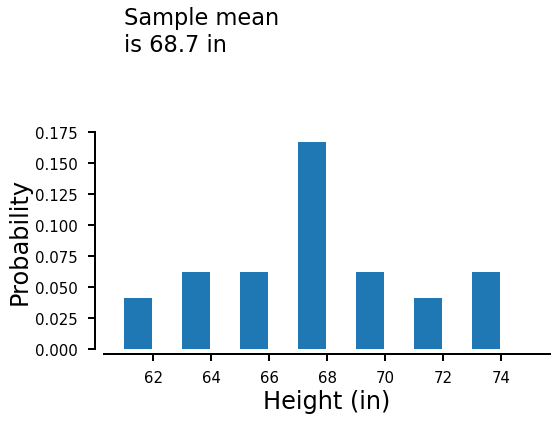

In [13]:
class_heights = [69, 65, 67, 69, 70, 69, 70, 75, 69, 66, 75, 62, 69, 75, 69, 65, 
                 64, 63, 72, 72, 70, 68, 69, 66]

x_min = min(class_heights)
x_max = max(class_heights)
print(x_min, x_max)
x = np.arange(x_min, x_max+2, 2)  #  Look at effect of adding 0, 1, 2, to x_max
print(x)

fig = plt.figure( figsize = (8, 4) )

ax = fig.add_subplot(111)
half_frame(ax, 'Height (in)', 'Probability', font_size = my_font_size)
ax.hist(class_heights, bins = x, density = True, width = 0.95, align = 'left')

ax.text( 61, 0.24, f"Sample mean\nis {np.mean(class_heights):.1f} in", 
         fontsize = 1.5 * my_font_size )

plt.show()

print()

In [14]:
n = 5
# create variable to store new samples
#
new_bootstrap_sample = []

# sample with replacement from a population
#
new_bootstrap_sample.append( choices(class_heights, k = n) )
# print(new_bootstrap_sample)

# Now do it many times so you generate a bootstrapped sampling distribution
#



[[63, 66, 68, 75, 69]]


# Point estimation

Point estimation involves the use of sample data to calculate a single value (known as a point estimate or statistic) which is to serve as a **best guess or best estimate** of an unknown **population parameter** (for example, the population mean). More formally, it is **the application of a point estimator to the data to obtain a point estimate**.

Point estimation can be used in alternative or in conjunction with **interval estimation**. Interval estimates are typically either **confidence intervals** in the case of frequentist inference, or **credible intervals** in the case of Bayesian inference. 

Typically, one uses $\theta$ to denote an **arbitrary statistic**, $\hat\Theta$ to denote a **point estimator** for that statistic, and $\hat\theta$ to denote a **point estimate** of that statistic.

.

.

.

.

.

.

Ideally, a point estimator would be unbiased and have low variance (that is, rapid convergence to asymptotic value). These requirements can be quantified using a **loss function** which dependes on the  difference between estimated and true values for an instance of data.  Two examples of loss functions are squared errors and absolute errors. **The risk is the expected value of the loss function**.

Because no estimator is optimal for all applications, a number of different 
estimators have been developed:

* minimum-variance mean-unbiased estimator (MVUE) $-$ minimizes risk of the squared-error loss-function.
* best linear unbiased estimator (BLUE)
* minimum mean squared error (MMSE)
* median-unbiased estimator $-$ minimizes the risk of the absolute-error loss function
* maximum likelihood estimator (MLE)
* method of moments and generalized method of moments

.

.

.

.

.

.


## Method of moments

Let's consider a simple example: a normal distribution. The normal is characterized by two parameters, $\mu$ and $\sigma^2$.  If our data was generated by an i.i.d. normal process, then we just need to obtain estimates of these two parameters.  

We know from the properties of the normal distribution that $E[X] = \mu$ and $E[(X-\mu)^2] = \sigma^2$.

In the method of moments, we calculate the sample moments, $\bar x$ and $s^2$, and equate them with the parameters:

> $~~~~~~~~~ \bar x = \hat\mu ~~~~~~~$ and $~~~~~~~~~ s^2 = \hat {\sigma^2}$


Things are even easier for the exponential distribution because it has a single parameter $\lambda$.  In this case, we need to calculate a single moment from the sample.  For the exponential distribution, we have $E[X] = \lambda^{-1}$. It then follows that:

> $~~~~~~~~~ \bar x = \hat\lambda ^{-1}$

The method of moments is a **consistent estimator**, that is, as the size of the sample increases, the resulting sequence of estimates converges in probability to the true value. This means that **the distributions of the estimates become more and more concentrated near the true value of the parameter being estimated, so that the probability of the estimator being arbitrarily close to its true value converges to one**. 

Sadly, the method of moments is also typically biased.

**Think of what type of situation would result in a bias and code a test for your hypothesis.**


In [ ]:
n_samples = 100
mu = []
sigma = []



## Maximum likelihood estimator (MLE) 

MLE obtains parameter estimates by finding the parameter values that maximize the likelihood function. The estimates are called maximum likelihood estimates.  From the point of view of Bayesian inference, MLE is a special case of maximum *a posteriori* estimation (MAP) that assumes a uniform prior distribution of the parameters.

The likelihood function for a sample of discrete random variable $X$ drawn from a probability distribution with parameters **$\theta$** is defined as 

$~~~~~~~~~ {\cal L}(\theta; x_1, x2, ..., x_N) = \Pi_{i=1}^N Pr(X = x_i; \theta)$

The MLE of $\theta$ is the one that maximizes the likelihood.  Frequently, one maximizes the **log-likelihood instead since it yields the same values but makes calculations easier**.

.

.

.

.


For some models, a maximum likelihood estimator can be found as an explicit function of the observed data. For others, however, no closed-form solution to the maximization problem is known or available, and an MLE can only be found via **numerical optimization**. 

Moreover, for some problems, there may be multiple values that maximize the likelihood. For other problems, no maximum likelihood estimate exists: either the log-likelihood function increases without ever reaching a supremum value, or the supremum does exist but is outside the set of acceptable parameter values. 

In [ ]:
x =  stats.expon.rvs(0, 1, 10000)

# print(help(stats.expon.fit))

out = stats.norm.fit(x)
print(type(out))
print(len(out))
print(out)

loc, lamb = stats.expon.fit(x)

print(lamb)
print(out[1])

Under very general and non-restrictive conditions, the MLE of a parameter $\theta$ for a large sample has the following properties:

1. $\Theta_{MLE}$ is an approximately unbiased estimator.

2. The variance of $\Theta_{MLE}$ is **nearly as small** as the variance that could be obtained with **any other estimator**.

3. $\Theta_{MLE}$ has an approximate normal distribution.

The implications of these properties are actually quite helpful. Promising *lack of bias* or *smallest variance* is really hard, but the MLE promises the next best thing: that it is close to those goals.

The approximate normal distribution is also nice because it tells us we can calculate many things by learning just two parameter values.

However, not all is perfect in MLE land.  The implementation of the method may involve using approximations 
in cases where determining the maximum of the likelihood function is difficult. 

# What does this all mean?

Given a random sample, and even if we know what statistical model/process generated that data, we are still facing the challenge of estimating the parameters of the statistical process.

As you have seen this is not easy.  The estimates of the parameters are themselves random variables with their own distributions.  

What do we **truly know** about our estimates?

How can we decide whether two samples were generated by the same statistical model with the same parameter values?

How much confidence can we have about anything based on our data?  Imagine the random variable is a  pressure measurement and that we are concerned about a container that will only withstand a given maximum pressure. How confident are we that the container will not fail?



## Exercise

Generate a random sample with N observations (data points) drawn from an exponential distribution.

Obtain the MLE estimate of the parameter using the .fit() function.

Obtain the method of moments estimate of the parameter.

Find how the difference in the two estimates change with N.

In [34]:
N = 50000
sample = stats.expon.rvs(0, 1, size = N)

In [35]:
estimate_loc_mle, estimate_lambda_mle = stats.expon.fit(sample)
print(estimate_lambda_mle)

1.0010309635967929


In [36]:
estimate_lambda_mom = 1. / sample.mean()
print(estimate_lambda_mom)

0.998944517477003


In [37]:
delta = estimate_lambda_mle - estimate_lambda_mom
print(delta)

0.00208644611978992
